In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("../data/train.csv")

In [3]:
data2 =pd.read_csv("../data/test.csv")

In [4]:
data = pd.concat([data1,data2],axis=0)

In [5]:
data.shape

(36457, 20)

In [6]:
data.shape

(36457, 20)

In [7]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

컬럼(columns) 설명  
index  
gender: 성별  
car: 차량 소유 여부  
reality: 부동산 소유 여부  
child_num: 자녀 수  
income_total: 연간 소득  
income_type: 소득 분류  
'Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'  
edu_type: 교육 수준  
'Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'  
family_type: 결혼 여부  
'Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'  
house_type: 생활 방식  
'Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment'  
DAYS_BIRTH: 출생일  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미  
DAYS_EMPLOYED: 업무 시작일  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미  
양수 값은 고용되지 않은 상태를 의미함  
FLAG_MOBIL: 핸드폰 소유 여부  
work_phone: 업무용 전화 소유 여부  
phone: 전화 소유 여부  
email: 이메일 소유 여부  
occyp_type: 직업 유형  
family_size: 가족 규모  
begin_month: 신용카드 발급 월  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미  
credit : 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (y 값으로 사용)  
낮을 수록 높은 신용의 신용카드 사용자를 의미함  

In [8]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,26457.000000
mean,18228.000000,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,1.519560
std,10524.373719,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,9114.000000,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,18228.000000,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,27342.000000,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,36456.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          36457 non-null  int64  
 1   gender         36457 non-null  object 
 2   car            36457 non-null  object 
 3   reality        36457 non-null  object 
 4   child_num      36457 non-null  int64  
 5   income_total   36457 non-null  float64
 6   income_type    36457 non-null  object 
 7   edu_type       36457 non-null  object 
 8   family_type    36457 non-null  object 
 9   house_type     36457 non-null  object 
 10  DAYS_BIRTH     36457 non-null  int64  
 11  DAYS_EMPLOYED  36457 non-null  int64  
 12  FLAG_MOBIL     36457 non-null  int64  
 13  work_phone     36457 non-null  int64  
 14  phone          36457 non-null  int64  
 15  email          36457 non-null  int64  
 16  occyp_type     25134 non-null  object 
 17  family_size    36457 non-null  float64
 18  begin_m

In [10]:
data = data.drop(columns=['index', 'FLAG_MOBIL'])

In [11]:
data.groupby(['gender','credit'])['credit'].count()

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64

In [12]:
data.groupby(['car','credit'])['credit'].count()

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64

In [13]:
data.groupby(['reality','credit'])['credit'].count()

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64

In [14]:
data.groupby(['income_type','credit'])['credit'].count()

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64

In [15]:
data.groupby(['edu_type','credit'])['credit'].count()

edu_type                       credit
Academic degree                0.0           2
                               1.0           7
                               2.0          14
Higher education               0.0         909
                               1.0        1751
                               2.0        4502
Incomplete higher              0.0         114
                               1.0         246
                               2.0         660
Lower secondary                0.0          28
                               1.0          59
                               2.0         170
Secondary / secondary special  0.0        2169
                               1.0        4204
                               2.0       11622
Name: credit, dtype: int64

In [16]:
data.groupby(['family_type','credit'])['credit'].count()

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11843
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64

data.groupby(['reality','credit'])['credit'].count()

In [17]:
data['edu_type'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

# child_num 이상치 변경

In [18]:
data['child_num'].value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: child_num, dtype: int64

In [19]:
data = data[data['child_num'] <= 3]
data['child_num'].value_counts()

0    25201
1     7492
2     3256
3      419
Name: child_num, dtype: int64

In [20]:
data['child_num'].value_counts()

0    25201
1     7492
2     3256
3      419
Name: child_num, dtype: int64

# Binary 
- gender
- car
- reality

## gender

In [21]:
data['gender'] = data['gender'].replace({'F' : 0, 'M' : 1})
data['gender'].value_counts()

0    24369
1    11999
Name: gender, dtype: int64

## car

In [22]:
data['car'] = data['car'].replace({'N' : 0, 'Y' : 1})
data['car'].value_counts()

0    22587
1    13781
Name: car, dtype: int64

## reality

In [23]:
data['reality'] = data['reality'].replace({'N' : 0, 'Y' : 1})
data['reality'].value_counts()

1    24443
0    11925
Name: reality, dtype: int64

# Categorical variables
- income_type
- edu_type
- family_type
- house_type

In [24]:
data['income_type'].value_counts()

Working                 18755
Commercial associate     8477
Pensioner                6152
State servant            2973
Student                    11
Name: income_type, dtype: int64

In [25]:
data['edu_type'].value_counts()

Secondary / secondary special    24714
Higher education                  9845
Incomplete higher                 1404
Lower secondary                    373
Academic degree                     32
Name: edu_type, dtype: int64

In [26]:
data['family_type'].value_counts()

Married                 24970
Single / not married     4828
Civil marriage           2945
Separated                2093
Widow                    1532
Name: family_type, dtype: int64

In [27]:
data['house_type'].value_counts()

House / apartment      32467
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          160
Name: house_type, dtype: int64

In [28]:
#data = pd.get_dummies(data, columns = ['income_type', 'edu_type', 'family_type', 'house_type'])
#data.head()

# Continuous variables
- DAYS_BIRTH
- DAYS_EMPLOYED
- begin_month

아직 직장이 없는 사람들의 인덱스 번호

In [29]:
idx = data[data['DAYS_EMPLOYED'] > 0].index
idx

Int64Index([  14,   18,   21,   24,   46,   48,   52,   58,   59,   60,
            ...
            9946, 9951, 9953, 9954, 9967, 9968, 9981, 9988, 9992, 9994],
           dtype='int64', length=6135)

직장이 있는 사람은 1 직장이 없는 사람은 0

In [30]:
data['working'] = 1
data.loc[idx, 'working'] = 0

# 'working' 열의 빈도수를 구하세요.
data['working'].value_counts()

1    27459
0     8909
Name: working, dtype: int64

In [31]:
data = data[data['working']==1]

In [32]:
data['occyp_type'].fillna('no_working',inplace = True)

In [33]:
data.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type          0
family_size         0
begin_month         0
credit           6920
working             0
dtype: int64

아직 직장이 없는 사람의 일한 날짜를 초기화시킴

In [34]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].abs()
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
data['begin_month'] = data['begin_month'].abs()

# 세 열의 최대, 최소값을 구하세요.
data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].agg(['max', 'min'])

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
max,24611,15713,60.0
min,7489,17,0.0


In [35]:
data['year'] = data['DAYS_BIRTH'] // 365
data['year']

1       31
2       52
3       41
4       41
5       36
        ..
9990    49
9996    29
9997    57
9998    45
9999    25
Name: year, Length: 27459, dtype: int64

In [36]:
data['work_year'] = (data['DAYS_EMPLOYED'] // 365)
data['work_year']

1        4
2       12
3        5
4        5
5       13
        ..
9990    22
9996     3
9997    38
9998     2
9999     0
Name: work_year, Length: 27459, dtype: int64

In [37]:
data['card Issuance'] = (data['begin_month'] // 12)

In [38]:
a= data.groupby(['card Issuance'])[['gender']].count().reset_index()
a

,card Issuance,gender
0,0.0,6592
1,1.0,6627
2,2.0,5707
3,3.0,4783
4,4.0,3509
5,5.0,241


In [39]:
a.columns = ['begin_month', 'counts']
a

,begin_month,counts
0,0.0,6592
1,1.0,6627
2,2.0,5707
3,3.0,4783
4,4.0,3509
5,5.0,241


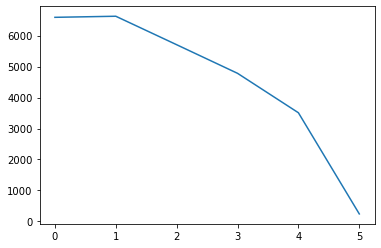

In [40]:
plt.plot(a['begin_month'], a['counts'])

In [41]:
data.drop(columns ='begin_month', inplace = True)

# 중복값 제거

In [42]:
data.shape

(27459, 21)

In [43]:
data = data.drop_duplicates(keep = 'first')
data.shape

(21769, 21)

# 컬럼 추가
- ability
- income_mean

In [44]:
#수입을 (나이, 연차의 합)으로 나눈 값
data['ability'] = data['income_total'] / (data['DAYS_BIRTH'] + data['DAYS_EMPLOYED'])
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,phone,email,occyp_type,family_size,credit,working,year,work_year,card Issuance,ability
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,...,0,1,Laborers,3.0,1.0,1,31,4,0.0,19.156347
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,...,1,0,Managers,2.0,2.0,1,52,12,1.0,19.131840
3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,...,1,0,Sales staff,2.0,0.0,1,41,5,3.0,11.786962
4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,...,0,0,Managers,2.0,2.0,1,41,5,2.0,9.187959
5,0,0,1,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,13413,...,0,1,High skill tech staff,4.0,1.0,1,36,13,1.0,14.666739


In [45]:
# 가족의 평균 수입을 나타내는 값.
data['income_mean'] = data['income_total'] / data['family_size']
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,email,occyp_type,family_size,credit,working,year,work_year,card Issuance,ability,income_mean
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,...,1,Laborers,3.0,1.0,1,31,4,0.0,19.156347,82500.0
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,...,0,Managers,2.0,2.0,1,52,12,1.0,19.131840,225000.0
3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,...,0,Sales staff,2.0,0.0,1,41,5,3.0,11.786962,101250.0
4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,...,0,Managers,2.0,2.0,1,41,5,2.0,9.187959,78750.0
5,0,0,1,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,13413,...,1,High skill tech staff,4.0,1.0,1,36,13,1.0,14.666739,67500.0


In [46]:
# DAYS_BIRTH, DAYS_EMPLOYED drop

data = data.drop(columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED'])
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,...,email,occyp_type,family_size,credit,working,year,work_year,card Issuance,ability,income_mean
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,...,1,Laborers,3.0,1.0,1,31,4,0.0,19.156347,82500.0
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,0,...,0,Managers,2.0,2.0,1,52,12,1.0,19.131840,225000.0
3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0,...,0,Sales staff,2.0,0.0,1,41,5,3.0,11.786962,101250.0
4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,0,...,0,Managers,2.0,2.0,1,41,5,2.0,9.187959,78750.0
5,0,0,1,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,0,...,1,High skill tech staff,4.0,1.0,1,36,13,1.0,14.666739,67500.0


# 스케일링

In [47]:
data['income_total'] = data['income_total'] *130

In [48]:
data['income_total'].describe()

count    2.176900e+04
mean     2.508959e+07
std      1.347582e+07
min      3.510000e+06
25%      1.755000e+07
50%      2.281500e+07
75%      2.925000e+07
max      2.047500e+08
Name: income_total, dtype: float64

C:\Users\Samsung\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'income_total')

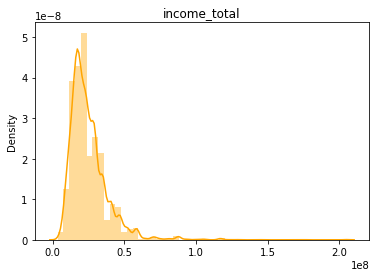

In [49]:
sns.distplot(data[['income_total']], bins = 50, color = 'orange')
plt.title('income_total')

C:\Users\Samsung\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Samsung\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


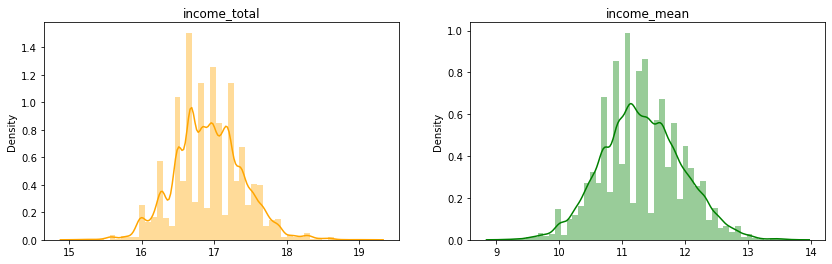

In [50]:
data['income_total'] = np.log1p(data['income_total'])
data['income_mean'] = np.log1p(data['income_mean'])

# 위의 그래프를 그리세요.
plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
sns.distplot(data[['income_total']], bins = 50, color = 'orange')
plt.title('income_total')

plt.subplot(1,2,2)
sns.distplot(data[['income_mean']], bins = 50, color = 'green')
plt.title('income_mean')

plt.show()

In [51]:
X = data.drop(columns = 'credit')
y = data['credit']

In [52]:
X.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'working', 'year', 'work_year',
       'card Issuance', 'ability', 'income_mean'],
      dtype='object')

In [53]:
X

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,working,year,work_year,card Issuance,ability,income_mean
1,0,0,1,1,17.286700,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,Laborers,3.0,1,31,4,0.0,19.156347,11.320566
2,1,1,1,0,17.884537,Working,Higher education,Married,House / apartment,0,1,0,Managers,2.0,1,52,12,1.0,19.131840,12.323860
3,0,0,1,0,17.086030,Commercial associate,Secondary / secondary special,Married,House / apartment,0,1,0,Sales staff,2.0,1,41,5,3.0,11.786962,11.525358
4,0,1,1,0,16.834715,State servant,Higher education,Married,House / apartment,0,0,0,Managers,2.0,1,41,5,2.0,9.187959,11.274046
5,0,0,1,2,17.373712,Working,Secondary / secondary special,Married,House / apartment,0,0,1,High skill tech staff,4.0,1,36,13,1.0,14.666739,11.119898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1,0,0,1,17.108009,State servant,Higher education,Married,Office apartment,0,0,0,Core staff,3.0,1,40,7,2.0,11.819116,11.141876
9996,1,1,1,0,17.086030,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,Laborers,2.0,1,29,3,2.0,16.597000,11.525358
9997,0,0,1,0,17.453754,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Medicine staff,2.0,1,57,38,4.0,8.349032,11.893080
9998,0,1,0,0,16.968247,Commercial associate,Secondary / secondary special,Married,House / apartment,0,1,0,no_working,2.0,1,45,2,2.0,10.212187,11.407576


컬럼(columns) 설명  
index  
gender: 성별  
car: 차량 소유 여부  
reality: 부동산 소유 여부  
child_num: 자녀 수  
income_total: 연간 소득  
income_type: 소득 분류  
'Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'  
edu_type: 교육 수준  
'Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'  
family_type: 결혼 여부  
'Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'  
house_type: 생활 방식  
'Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment'  
DAYS_BIRTH: 출생일  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미  
DAYS_EMPLOYED: 업무 시작일  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미  
양수 값은 고용되지 않은 상태를 의미함  
FLAG_MOBIL: 핸드폰 소유 여부  
work_phone: 업무용 전화 소유 여부  
phone: 전화 소유 여부  
email: 이메일 소유 여부  
occyp_type: 직업 유형  
family_size: 가족 규모  
begin_month: 신용카드 발급 월  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미  
credit : 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (y 값으로 사용)  
낮을 수록 높은 신용의 신용카드 사용자를 의미함  

In [54]:
data.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'credit', 'working', 'year', 'work_year',
       'card Issuance', 'ability', 'income_mean'],
      dtype='object')

In [55]:
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,...,email,occyp_type,family_size,credit,working,year,work_year,card Issuance,ability,income_mean
1,0,0,1,1,17.286700,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,...,1,Laborers,3.0,1.0,1,31,4,0.0,19.156347,11.320566
2,1,1,1,0,17.884537,Working,Higher education,Married,House / apartment,0,...,0,Managers,2.0,2.0,1,52,12,1.0,19.131840,12.323860
3,0,0,1,0,17.086030,Commercial associate,Secondary / secondary special,Married,House / apartment,0,...,0,Sales staff,2.0,0.0,1,41,5,3.0,11.786962,11.525358
4,0,1,1,0,16.834715,State servant,Higher education,Married,House / apartment,0,...,0,Managers,2.0,2.0,1,41,5,2.0,9.187959,11.274046
5,0,0,1,2,17.373712,Working,Secondary / secondary special,Married,House / apartment,0,...,1,High skill tech staff,4.0,1.0,1,36,13,1.0,14.666739,11.119898


In [56]:
data = data.drop(columns = 'working')

In [83]:
data.columns

Index(['성별', '차유뮤', '부동산유무', '자녀수', '연간소득', '소득분류', '교육', '가정', '집',
       '업무용핸드폰유무', '핸드폰유무', '이메일유무', '직업유형', '가족수', '신용등급', '나이', '연차',
       '카드발급년수', '능력', '가족평균수입'],
      dtype='object')

In [57]:
data.columns = ['성별', '차유뮤', '부동산유무', '자녀수', '연간소득', '소득분류',
       '교육','가정', '집','업무용핸드폰유무','핸드폰유무','이메일유무','직업유형','가족수','신용등급', '나이','연차','카드발급년수', '능력', '가족평균수입']

In [95]:
data[''].value_counts()

6.649591     15
11.113855    14
10.071620    14
15.837466    14
11.331587    14
             ..
33.720495     1
12.748598     1
4.734682      1
13.348363     1
11.690271     1
Name: 능력, Length: 7453, dtype: int64

In [96]:
data.groupby(['카드발급년수'])['성별'].count()

카드발급년수
0.0    5286
1.0    5135
2.0    4433
3.0    3821
4.0    2869
5.0     225
Name: 성별, dtype: int64

In [60]:
data.to_csv('신용등급예측.csv', index=False, encoding= 'CP949')

In [61]:
df = pd.read_csv('신용등급예측.csv', encoding = 'CP949')

In [62]:
df

,성별,차유뮤,부동산유무,자녀수,연간소득,소득분류,교육,가정,집,업무용핸드폰유무,핸드폰유무,이메일유무,직업유형,가족수,신용등급,나이,연차,카드발급년수,능력,가족평균수입
0,0,0,1,1,17.286700,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,Laborers,3.0,1.0,31,4,0.0,19.156347,11.320566
1,1,1,1,0,17.884537,Working,Higher education,Married,House / apartment,0,1,0,Managers,2.0,2.0,52,12,1.0,19.131840,12.323860
2,0,0,1,0,17.086030,Commercial associate,Secondary / secondary special,Married,House / apartment,0,1,0,Sales staff,2.0,0.0,41,5,3.0,11.786962,11.525358
3,0,1,1,0,16.834715,State servant,Higher education,Married,House / apartment,0,0,0,Managers,2.0,2.0,41,5,2.0,9.187959,11.274046
4,0,0,1,2,17.373712,Working,Secondary / secondary special,Married,House / apartment,0,0,1,High skill tech staff,4.0,1.0,36,13,1.0,14.666739,11.119898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,1,0,0,1,17.108009,State servant,Higher education,Married,Office apartment,0,0,0,Core staff,3.0,NaN,40,7,2.0,11.819116,11.141876
21765,1,1,1,0,17.086030,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,Laborers,2.0,NaN,29,3,2.0,16.597000,11.525358
21766,0,0,1,0,17.453754,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Medicine staff,2.0,NaN,57,38,4.0,8.349032,11.893080
21767,0,1,0,0,16.968247,Commercial associate,Secondary / secondary special,Married,House / apartment,0,1,0,no_working,2.0,NaN,45,2,2.0,10.212187,11.407576


0 Accountants               
1 Cleaning staff            
2 Cooking staff             
3 Core staff              
4 Drivers               
5 HR staff                   
6 High skill tech staff    
7 IT staff                  
8 Laborers                 
9 Low-skill Laborers    
10 Managers                 
11 Medicine staff            
12 Private service staff     
13 Realty agents          
14 Sales staff             
15 Secretaries               
16 Security staff            
17 Waiters/barmen staff      
18 no_working               


In [63]:
X_train = df.loc[:15835,:]
X_test = df.loc[15836:,:]

In [64]:
X_train['신용등급'].tail()

15831    1.0
15832    2.0
15833    2.0
15834    2.0
15835    2.0
Name: 신용등급, dtype: float64

In [65]:
X_test['신용등급'].head()

15836   NaN
15837   NaN
15838   NaN
15839   NaN
15840   NaN
Name: 신용등급, dtype: float64

In [66]:
X_train.shape

(15836, 20)

In [67]:
X_test.shape

(5933, 20)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

scaler = LabelEncoder()

scaler.fit(X_train['소득분류'])
X_train['소득분류'] = scaler.transform(X_train['소득분류'])
X_test['소득분류'] = scaler.transform(X_test['소득분류'])

scaler.fit(X_train['교육'])
X_train['교육'] = scaler.transform(X_train['교육'])
X_test['교육'] = scaler.transform(X_test['교육'])

scaler.fit(X_train['가정'])
X_train['가정'] = scaler.transform(X_train['가정'])
X_test['가정'] = scaler.transform(X_test['가정'])

scaler.fit(X_train['집'])
X_train['집'] = scaler.transform(X_train['집'])
X_test['집'] = scaler.transform(X_test['집'])

scaler.fit(X_train['직업유형'])
X_train['직업유형'] = scaler.transform(X_train['직업유형'])
X_test['직업유형'] = scaler.transform(X_test['직업유형'])

<ipython-input-68-2f9c29b67f66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['소득분류'] = scaler.transform(X_train['소득분류'])
<ipython-input-68-2f9c29b67f66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['소득분류'] = scaler.transform(X_test['소득분류'])
<ipython-input-68-2f9c29b67f66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [69]:
X_train.to_csv('신용등급분석_train.csv', encoding = 'CP949', index = False)
X_test.to_csv('신용등급분석_test.csv', encoding = 'CP949', index = False)

In [70]:
X_train_0 = X_train
X_test_0 = X_test

In [71]:
X_train = X_train_0.drop(columns = '신용등급')
y_train = X_train_0['신용등급']

X_test = X_test_0.drop(columns ='신용등급')
y_test = X_test_0['신용등급']

In [72]:
#  스케일링 및 모델 튜닝

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

C:\Users\Samsung\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
df_y_hat = pd.DataFrame(y_hat)

In [74]:
df_y_hat.value_counts()

2.0    5933
dtype: int64

In [75]:
model.score(X_train,y_train)

0.6287572619348321

# XGBOOST

In [76]:
#  스케일링 및 모델 튜닝

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

C:\Users\Samsung\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
from sklearn.model_selection import cross_val_score

lst_scores_mean = []

scores = cross_val_score(model, X_train, y_train, cv=5)
lst_scores_mean.append(np.mean(scores))


lst_scores_mean

C:\Users\Samsung\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Samsung\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Samsung\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Samsung\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Samsung\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[0.603056077829128]

# Logistic Regression

In [78]:
#  스케일링 및 모델 튜닝

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

lst_scores_mean = []

scores = cross_val_score(model, X_train, y_train, cv=5)
lst_scores_mean.append(np.mean(scores))


lst_scores_mean

C:\Users\Samsung\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Samsung\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[0.6287572600013396]

In [79]:
X_test.head(1)

,성별,차유뮤,부동산유무,자녀수,연간소득,소득분류,교육,가정,집,업무용핸드폰유무,핸드폰유무,이메일유무,직업유형,가족수,나이,연차,카드발급년수,능력,가족평균수입
15836,0,0,1,0,16.680565,2,1,1,1,0,1,0,3,2.0,51,23,3.0,4.885109,11.119898


In [80]:
X_test.columns

Index(['성별', '차유뮤', '부동산유무', '자녀수', '연간소득', '소득분류', '교육', '가정', '집',
       '업무용핸드폰유무', '핸드폰유무', '이메일유무', '직업유형', '가족수', '나이', '연차', '카드발급년수', '능력',
       '가족평균수입'],
      dtype='object')

In [81]:
df_y_hat = pd.DataFrame(y_hat)

In [82]:
df_y_hat.value_counts()

2.0    5933
dtype: int64